<a href="https://colab.research.google.com/github/aparnaashok2125/Cognifyz-ML-Internship/blob/main/Task_3_Classify_Restaurants_Based_on_Their_Cuisines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Upload & Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving Dataset .csv to Dataset .csv


In [4]:
# Preprocessing

# Drop rows with missing 'Cuisines' (target column)
df = df.dropna(subset=['Cuisines'])

# Reduce to most frequent cuisines to simplify classification
top_cuisines = df['Cuisines'].value_counts().nlargest(5).index
df = df[df['Cuisines'].isin(top_cuisines)]

# Drop irrelevant columns
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Rating color', 'Rating text']
df = df.drop(columns=drop_cols)

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns.drop('Cuisines')
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Encode target variable: 'Cuisines'
df['Cuisines'] = le.fit_transform(df['Cuisines'])

In [5]:
# Split Data
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Train Classification Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Evaluate Model
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.46184738955823296

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.18      0.23        71
           1       0.48      0.45      0.46        71
           2       0.53      0.59      0.56       187
           3       0.42      0.48      0.45       102
           4       0.42      0.37      0.40        67

    accuracy                           0.46       498
   macro avg       0.43      0.42      0.42       498
weighted avg       0.45      0.46      0.45       498



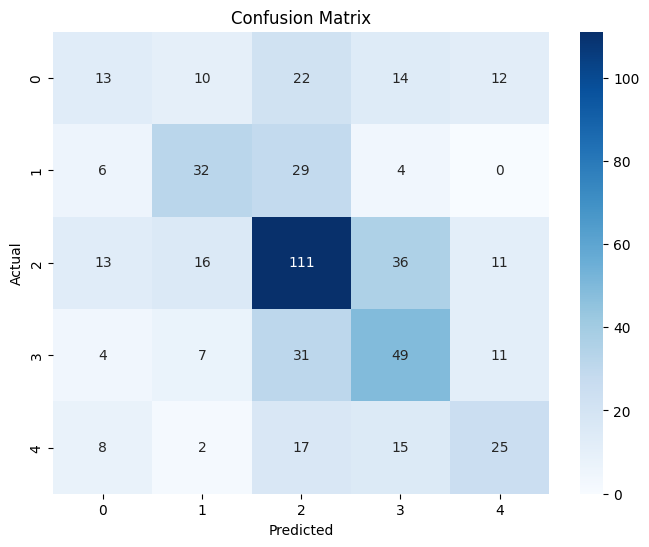

In [8]:
# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

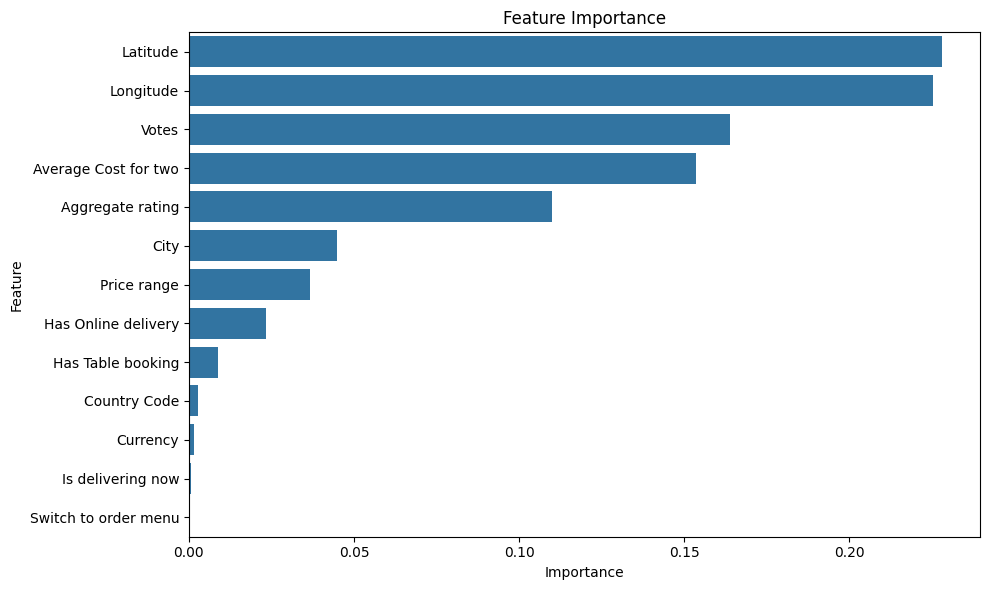

In [9]:
# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()